# 项目介绍

**项目描述**
本项目旨在分析淘宝用户的行为数据，以深入理解用户的行为模式、购买偏好以及用户与商品之间的互动关系。项目基于2017年11月25日至12月3日期间的约100万淘宝用户的行为数据，包括点击、购买、加入购物车和收藏等行为。通过数据处理、特征提取和可视化展示，本项目旨在挖掘出用户行为的潜在规律，为淘宝平台的运营优化、个性化推荐以及市场策略制定提供有力支持。

**技能应用**
在项目实施过程中，主要应用了以下技能：  
数据预处理：利用pandas库对原始数据进行清洗、格式转换和压缩，确保数据质量和处理效率。  
数据处理与特征提取：通过提取用户ID、商品ID、商品类别ID、行为类型和时间戳等关键特征，构建用户行为模型。  
时间序列分析：将时间戳转换为日期时间格式，便于后续的时间序列分析和可视化。  
数据可视化：运用matplotlib和seaborn库，通过图表展示用户行为分布、购买趋势等关键信息，直观地呈现数据分析结果。  

**结果呈现**
通过本项目的数据分析，我们得到了以下关键发现：  
用户行为类型分布：展示了不同行为类型（点击、购买、加入购物车、收藏）的比例和分布情况。  
用户购买趋势：分析了用户购买行为的时间序列变化，揭示了购买活动的周期性规律。  
用户与商品互动模式：揭示了用户与不同类别商品之间的互动模式，为个性化推荐提供了依据。  
这些结果通过图表形式进行了展示，便于团队成员和利益相关者快速理解项目成果。  

**不足**
尽管本项目取得了一定的成果，但仍存在一些不足之处：  
数据局限性：由于只使用了约100万用户的行为数据，可能无法完全代表整个淘宝平台的用户行为特征。  
特征提取深度：当前项目主要关注了用户行为的基本特征，未深入挖掘更复杂的用户行为模式和潜在关联。  
模型应用：目前仅停留在数据分析层面，尚未构建预测模型或推荐系统，无法直接应用于实际业务场景。  

后续将进一步拓展数据来源、提升特征提取的深度和广度，并探索模型应用的可能性，以不断完善和优化本项目。  

# 数据信息

数据来源：[淘宝用户行为](https://tianchi.aliyun.com/dataset/649)  
UserBehavior.csv  
We random select about 1 million users who have behaviors including click, purchase, adding item to shopping cart and item favoring during **November 25 to December 03, 2017**. The dataset is organized in a very similar form to MovieLens-20M, i.e., each line represents a specific user-item interaction, which consists of **user ID, item ID, item's category ID, behavior type and timestamp**, separated by commas. The detailed descriptions of each field are as follows:

| Field         | Explanation                                                                                          |
|---------------|------------------------------------------------------------------------------------------------------|
| user_id       | An integer, the serialized ID that represents a user                                                 |
| item_id       | An integer, the serialized ID that represents an item                                                |
| category_id   | An integer, the serialized ID that represents the category to which the corresponding item belongs   |
| behavior_type | A string, enum-type from ('pv', 'buy', 'cart', 'fav')                                                |
| timestamp     | An integer, the timestamp of the behavior                                                            |

Note that the dataset contains 4 different types of behaviors, they are：
| Behavior | Explanation                                    |
|----------|------------------------------------------------|
| pv       | Page view of an item's detail page, equivalent to an item click |
| buy      | Purchase an item                               |
| cart     | Add an item to shopping cart                    |
| fav      | Favor an item                                  |

Dimensions of the dataset are：
| Dimension        | Number        |
|------------------|---------------|
| # of users       | 987,994       |
| # of items       | 4,162,024     |
| # of categories  | 9,439         |
| # of interactions| 100,150,807   |

# 0.Pre处理

## 导入必要库

In [1]:
import datetime,warnings,os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.4f}'.format

## 数据读取、了解数据

In [2]:
# 读取csv文件，添加列名，改变dtype，进行数据压缩
raw_df = pd.read_csv('./UserBehavior.csv', names=['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp'], 
                     dtype={'user_id': 'int32', 
                            'item_id': 'int32', 
                            'category_id': 'int32',
                           'behavior_type':'category'})

In [3]:
# 将 timestamp 列转换为日期时间格式
raw_df['timestamp'] = pd.to_datetime(raw_df['timestamp'], unit='s')

In [4]:
display(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int32         
 1   item_id        int32         
 2   category_id    int32         
 3   behavior_type  category      
 4   timestamp      datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(3)
memory usage: 2.0 GB


None

In [5]:
# 查看数据形状
print(raw_df.shape)

# 查看列名
print(list(raw_df.columns))

(100150807, 5)
['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']


# 1. 数据清洗和预处理

## 处理缺失值

In [6]:
#缺失值处理
raw_df.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
dtype: int64

## 异常值检测

In [7]:
# 查看描述性统计信息
raw_df.describe()

,user_id,item_id,category_id,timestamp
count,"100,150,807.0000","100,150,807.0000","100,150,807.0000",100150807
mean,"506,943.1217","2,579,774.7999","2,696,380.3917",2017-11-29 10:27:56.872216320
min,1.0000,1.0000,80.0000,1902-05-07 22:32:46
25%,"252,429.0000","1,295,225.0000","1,320,293.0000",2017-11-27 05:50:43
50%,"504,015.0000","2,580,735.0000","2,671,397.0000",2017-11-29 14:09:56
75%,"760,949.0000","3,862,042.0000","4,145,813.0000",2017-12-02 01:44:42
max,"1,018,011.0000","5,163,070.0000","5,162,429.0000",2037-04-09 05:22:35
std,"294,060.5027","1,488,055.9875","1,463,154.5235",NaN


### 日期异常检测

In [8]:
# 数据日期是November 25 to December 03, 2017
start_date = pd.to_datetime("2017-11-25 00:00:00")
end_date = pd.to_datetime("2017-12-03 23:59:59")

In [9]:
# 日期不在November 25 to December 03, 2017的数据记录
out_of_range_records = raw_df[(raw_df['timestamp'] < start_date) | (raw_df['timestamp'] > end_date)]
out_of_range_records.shape[0]

1236274

In [10]:
# 删除日期异常数据
date_range_df = raw_df[(raw_df['timestamp'] >= start_date) & (raw_df['timestamp'] <= end_date)]

In [11]:
date_range_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98914533 entries, 2 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int32         
 1   item_id        int32         
 2   category_id    int32         
 3   behavior_type  category      
 4   timestamp      datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(3)
memory usage: 2.7 GB


### 行为类型异常检测

In [12]:
date_range_df['behavior_type'].unique().tolist()

['pv', 'buy', 'fav', 'cart']

没有除['pv', 'buy', 'fav', 'cart']之外的类型异常，跳过

## 处理重复记录

In [13]:
# 检测重复值       
duplicate_rows = date_range_df.duplicated(keep=False)
duplicate_df = date_range_df[duplicate_rows]

In [14]:
duplicate_df

,user_id,item_id,category_id,behavior_type,timestamp
2293743,18711,3324300,1464116,buy,2017-11-26 06:07:19
2293745,18711,3324300,1464116,buy,2017-11-26 06:07:19
3542225,242650,3967698,796856,buy,2017-12-01 03:04:41
3542227,242650,3967698,796856,buy,2017-12-01 03:04:41
4294118,277134,3404251,149192,buy,2017-12-02 14:27:15
...,...,...,...,...,...
94960798,760852,2861071,235534,buy,2017-11-29 14:05:39
96891675,852356,1844451,1464116,buy,2017-11-29 12:15:04
96891677,852356,1844451,1464116,buy,2017-11-29 12:15:04
97358409,873834,3460344,1872294,buy,2017-11-27 05:26:51


重复数据理解为，用户同一时间同一商品购买多件，不做处理

# 2.统计分析

## 流量分析  
**访问量(PV)** ：Page View, 基于用户每次对淘宝页面的刷新次数，用户每刷新一次页面或者打开新的页面就记录就算一次访问。  
**独立访问量(UV)** ：Unique Visitor，一个用户若多次访问淘宝只记录一次。

In [15]:
traffic_df = date_range_df.copy()

In [16]:
# Split timestamp into date and hour columns
traffic_df['date'] = traffic_df['timestamp'].dt.date
traffic_df['hour'] = traffic_df['timestamp'].dt.hour

In [17]:
traffic_df.head()

,user_id,item_id,category_id,behavior_type,timestamp,date,hour
2,1,2576651,149192,pv,2017-11-25 01:21:25,2017-11-25,1
3,1,3830808,4181361,pv,2017-11-25 07:04:53,2017-11-25,7
4,1,4365585,2520377,pv,2017-11-25 07:49:06,2017-11-25,7
5,1,4606018,2735466,pv,2017-11-25 13:28:01,2017-11-25,13
6,1,230380,411153,pv,2017-11-25 21:22:22,2017-11-25,21


---

In [18]:
pv_daily = traffic_df.groupby('date')['user_id'].count().reset_index(name='pv')

In [19]:
pv_hourly = traffic_df.groupby('hour')['user_id'].count().reset_index(name='pv')

---

In [20]:
# 按日期统计 UV
uv_daily = traffic_df.groupby('date')['user_id'].nunique().reset_index(name='uv')

In [21]:
# 按日期统计 UV
uv_hourly = traffic_df.groupby('hour')['user_id'].nunique().reset_index(name='uv')

In [22]:
# 定义线图绘制函数，方便后续频繁调用
def draw_lineplot(data, x_col, y_col,title,x_label,y_label):
    """
    绘制折线图并添加数字标注
    
    参数:
    data (pd.DataFrame) - 需要绘制的数据
    x_column (str) - x轴对应的列名
    y_column (str) - y轴对应的列名
    title (str) - 图表标题
    x_label (str) - x轴标题
    y_label (str) - y轴标题
    """
    plt.figure(figsize=(20, 5))
    sns.lineplot(x=x_col, y=y_col, data=data, marker='o')
    
    # # 添加每日数字标注
    # for i, value in enumerate(data[y_col]):
    #     plt.annotate(f"{value:,.2f}", # 使用逗号分隔数字并保留两位小数
    #                  (data[x_col][i], value), 
    #                  textcoords="offset points", xytext=(0,10), ha='center')
    
    # 添加标签和标题
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

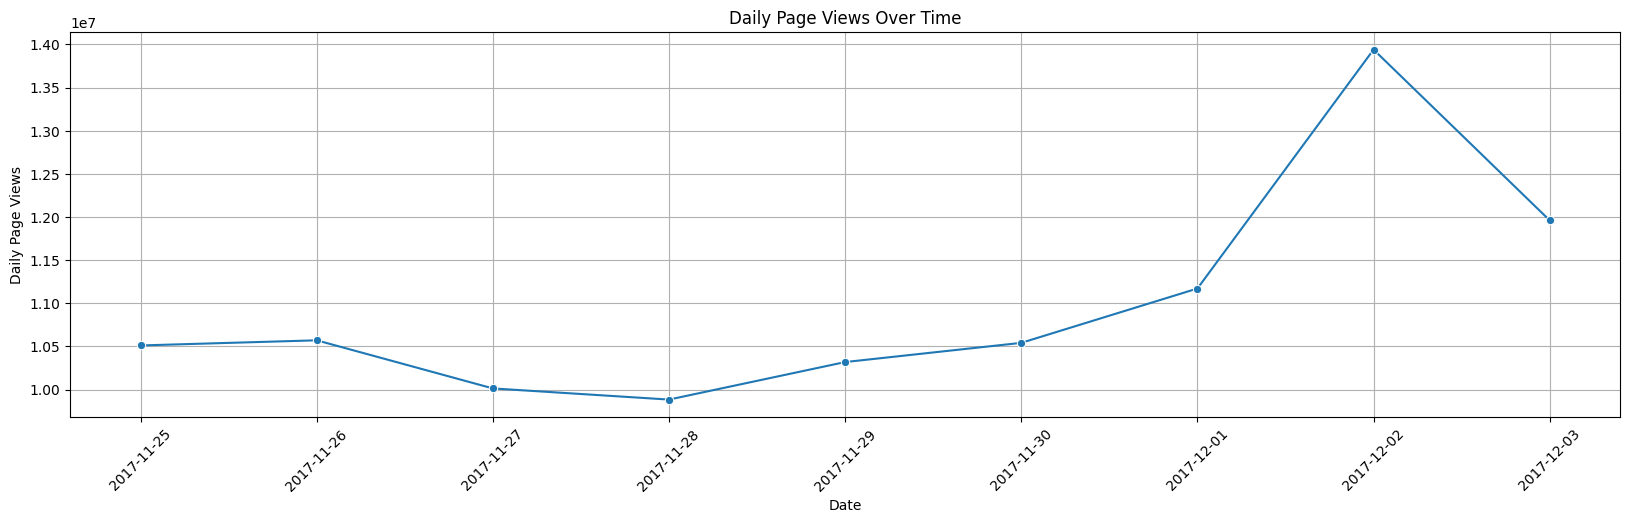

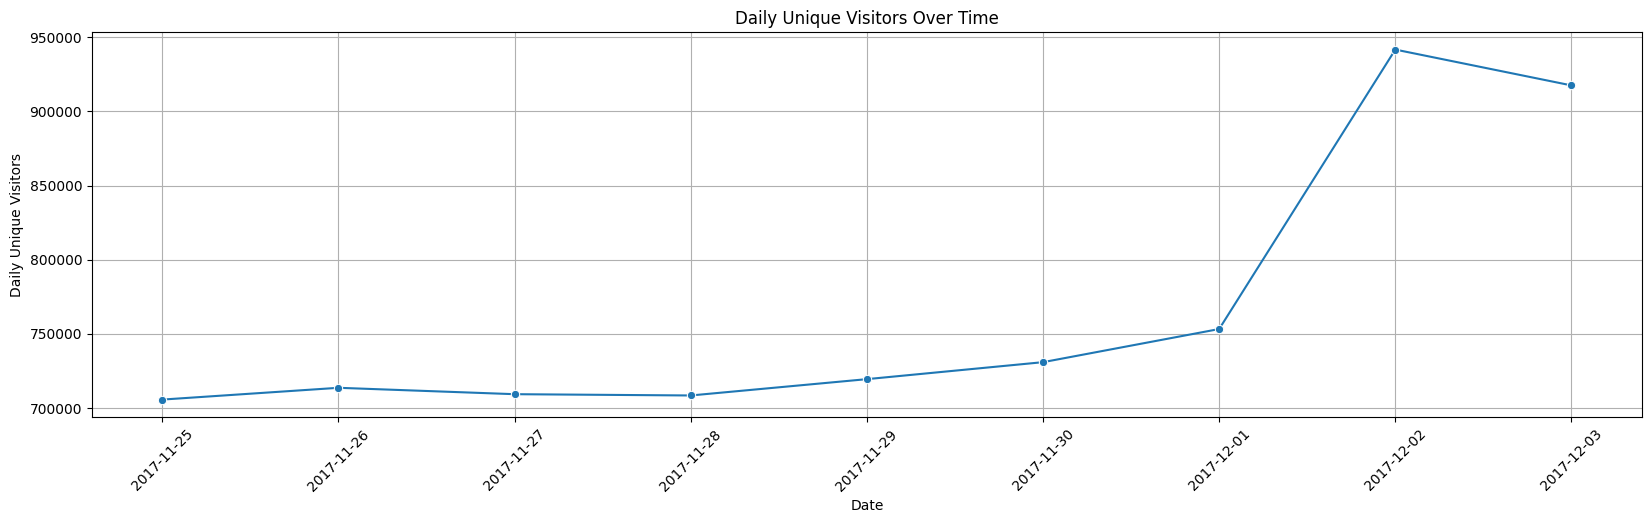

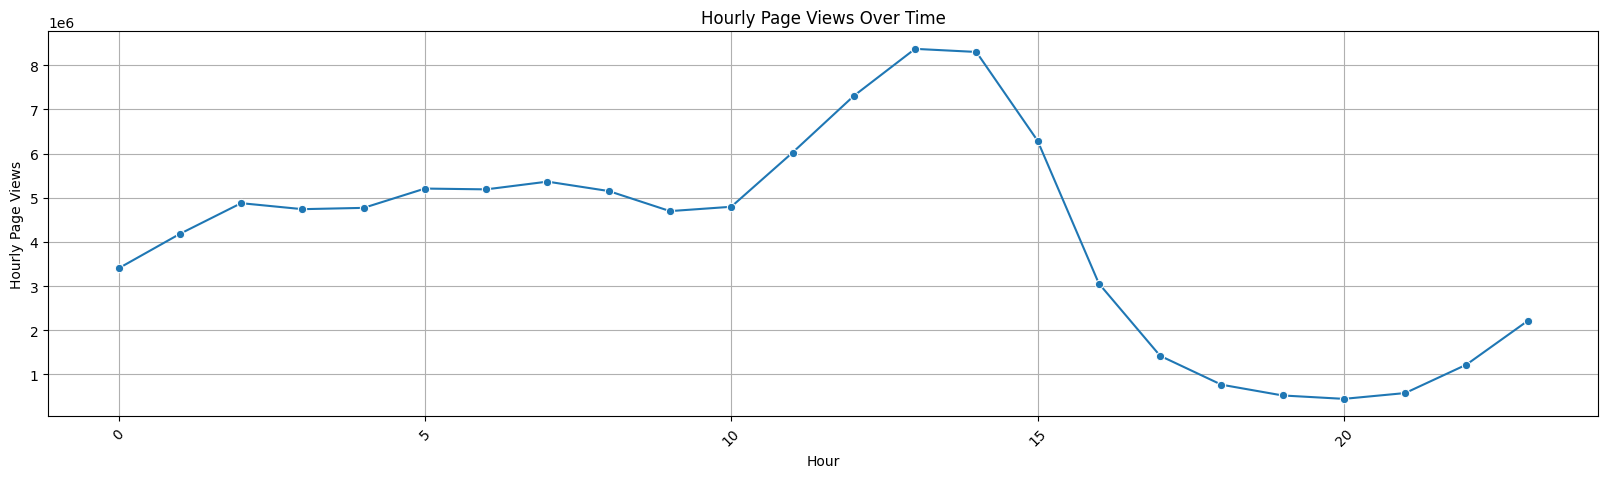

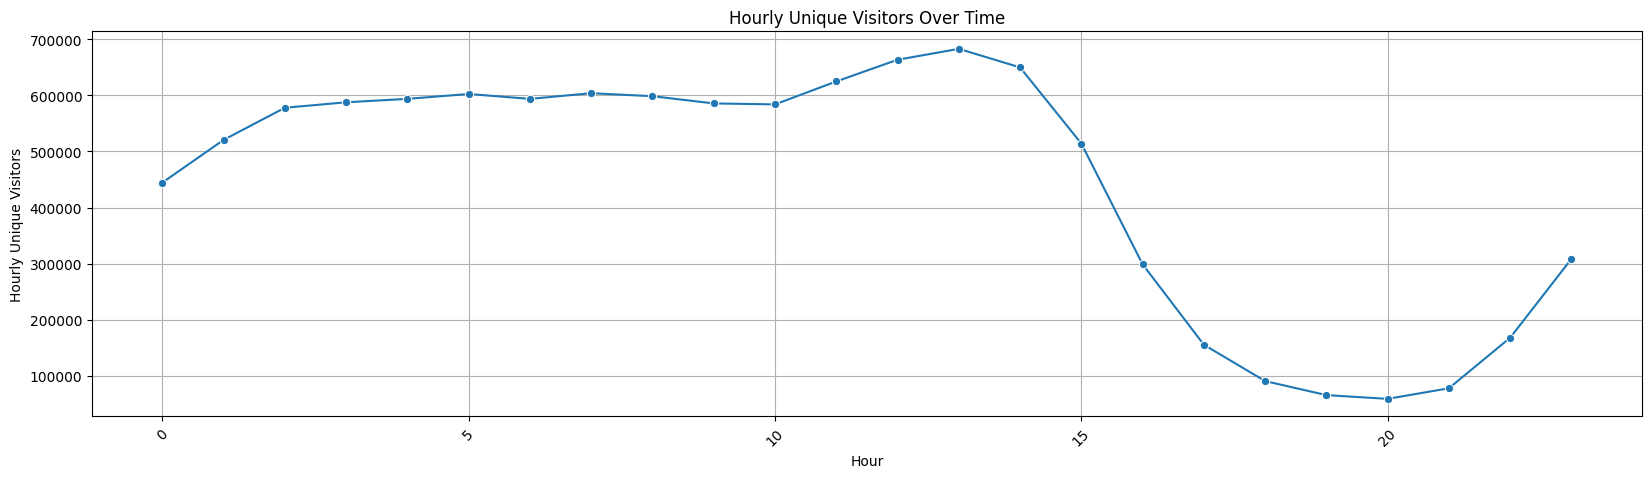

In [23]:
draw_lineplot(pv_daily,'date','pv','Daily Page Views Over Time','Date','Daily Page Views')
draw_lineplot(uv_daily,'date','uv','Daily Unique Visitors Over Time','Date','Daily Unique Visitors')
draw_lineplot(pv_hourly,'hour','pv','Hourly Page Views Over Time','Hour','Hourly Page Views')
draw_lineplot(uv_hourly,'hour','uv','Hourly Unique Visitors Over Time','Hour','Hourly Unique Visitors')

**流量分析结论**  
1. 总体趋势分析

PV和UV的增长趋势：从日期维度来看，PV和UV在2017年12月2日达到峰值，之后在12月3日有所下降。12月2日应该是淘宝双十二活动的一个节点。  

PV与UV的关系：PV和UV的数值在大多数情况下是正相关的，即页面浏览量随着独立访客数的增加而增加。然而，需要注意的是，PV的增长速度在某些日期超过了UV的增长，这可能意味着访客的平均浏览页面数有所增加。

2. 日间流量分布

小时维度的流量分析：从小时维度的数据可以看出，流量在一天中的分布是不均匀的。特别是在11月26日至12月3日的数据中，我们可以看到在晚上（如晚上11点到12点）的PV和UV都有明显的增加，这可能意味着用户在晚上有更多的时间上网浏览。

周末与工作日的比较：虽然数据只覆盖了一周多的时间，但我们可以尝试比较周末（如11月25日、11月26日、12月2日和12月3日）与工作日（如11月27日至11月30日）的流量。如果周末的PV和UV显著高于工作日，这可能表明用户在周末有更多的时间上网。

3. 用户行为分析

用户参与度：通过比较PV和UV的比值，我们可以估计用户的平均页面浏览量。例如，如果某一天的PV是UV的两倍，那么平均每个访客浏览了两个页面。这个比值可以作为用户参与度的一个指标。

用户留存率：通过观察连续几天的数据，我们可以分析用户的留存情况。如果用户在连续几天都有访问，那么这表明网站或应用有较好的用户留存率。

4. 营销活动效果分析

特定日期的流量变化：如果在某些特定日期（如促销日、节假日等）PV和UV有显著的增加，那么这可能是营销活动效果的直接体现。通过对比活动前后的数据，可以评估营销活动的有效性。

## 用户纬度分析

### 行为分类

In [24]:
# traffic_df.copy()

In [25]:
# 统计各类行为的次数
behavior_count_df = traffic_df['behavior_type'].value_counts().to_frame('Count').reset_index()

In [26]:
# 计算各类行为的占比
behavior_per_df = behavior_count_df.copy()
behavior_per_df['%'] = (behavior_per_df['Count'] / behavior_per_df['Count'].sum()) * 100

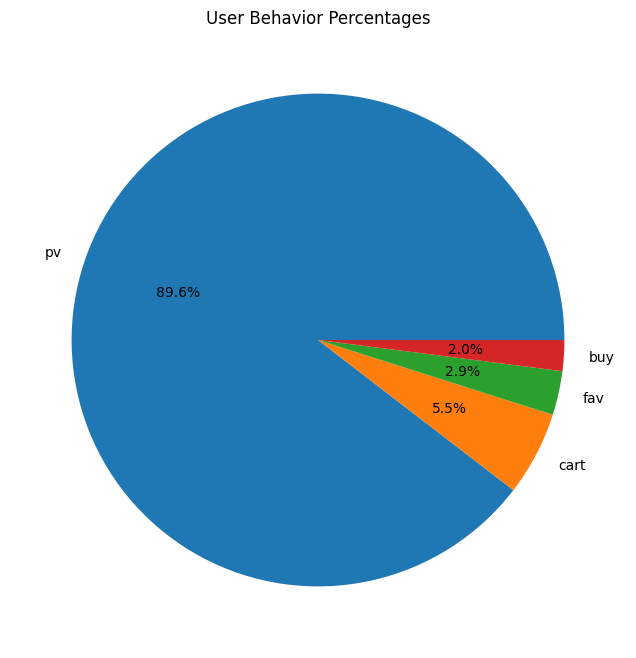

In [27]:
# 绘制饼图，autopct 参数用于设置数字显示格式
plt.figure(figsize=(12,8))
plt.pie(x=behavior_per_df['%'], labels=behavior_per_df['behavior_type'].tolist(), autopct='%1.1f%%')
plt.title('User Behavior Percentages')
# Show the plot
plt.show()

In [28]:
# 创建一个新的 DataFrame 来存储按 'hour' 分组后的数据
hourly_count_df = traffic_df.groupby('hour')['behavior_type'].value_counts().unstack().fillna(0).reset_index(drop=False)

In [29]:
# 重命名列
hourly_count_df.columns = ['hour','buy', 'cart', 'fav', 'pv']

In [30]:
hourly_count_df['pv_to_buy_rate'] = hourly_count_df['buy']/hourly_count_df['pv']*100

In [31]:
hourly_count_df

,hour,buy,cart,fav,pv,pv_to_buy_rate
0,0,64917,192036,103721,3042342,2.1338
1,1,96134,229890,127976,3728498,2.5784
2,2,127933,266963,147752,4334810,2.9513
3,3,122048,260831,145412,4213518,2.8966
4,4,118591,255811,140862,4255794,2.7866
5,5,123427,279829,150844,4653934,2.6521
6,6,122172,277093,148561,4642056,2.6319
7,7,122733,284269,151321,4806706,2.5534
8,8,116446,279035,148722,4607745,2.5272
9,9,101301,255342,137631,4203397,2.4100


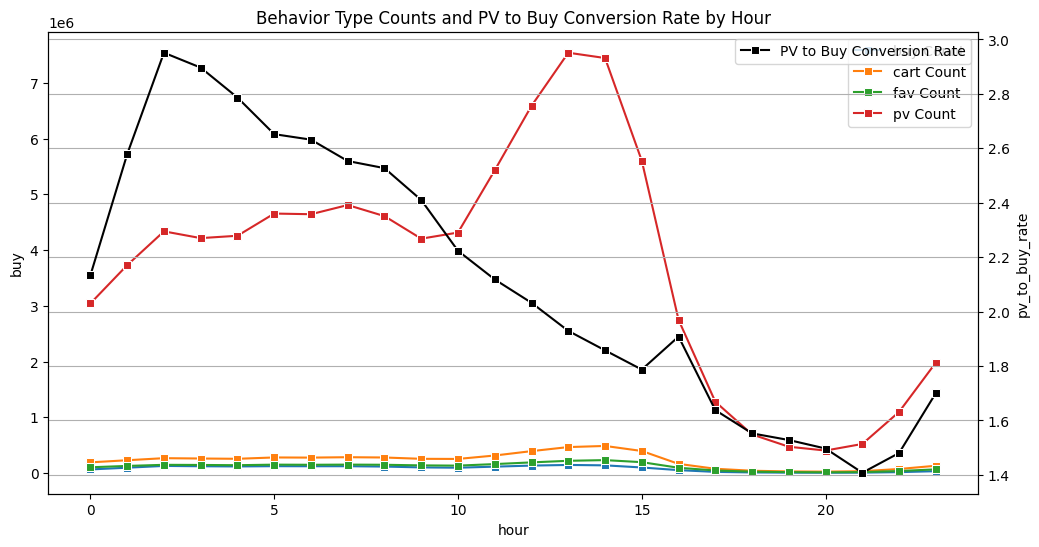

In [32]:
# 绘制每个小时的行为类型计数和转化率
plt.figure(figsize=(12, 6))

for name in ['buy', 'cart', 'fav', 'pv']:
    sns.lineplot(data=hourly_count_df, x='hour', y=name, marker='s', label=name + ' Count')

plt.twinx()
sns.lineplot(data=hourly_count_df, x='hour', y='pv_to_buy_rate', color='black', marker='s', label='PV to Buy Conversion Rate')

plt.xlabel('Hour')
plt.title('Behavior Type Counts and PV to Buy Conversion Rate by Hour')
plt.grid(True)
plt.show()

凌晨到上午的浏览-购买转化比较高，特别是在凌晨2点到上午10点之间，浏览到购买的转化率保持在2.13到2.53之间。
这表明在这个时间段内，用户更倾向于将浏览行为转化为实际购买行为，可能是因为用户在早期时间段更容易做出购买决策或者有更多时间进行线上购物。
因此，在这个时间段内，针对浏览行为的营销策略可能会更有效果。

### 漏斗分析

根据用户的行为路径，分析每个环节的转化率，方便找出不同阶段的增长任务优先级。

总的行为流程：pv—fav、cart—buy

**细分流程：**  
pv——buy  
pv——fav——buy  
pv——cart——buy  
pv——fav——cart——buy  

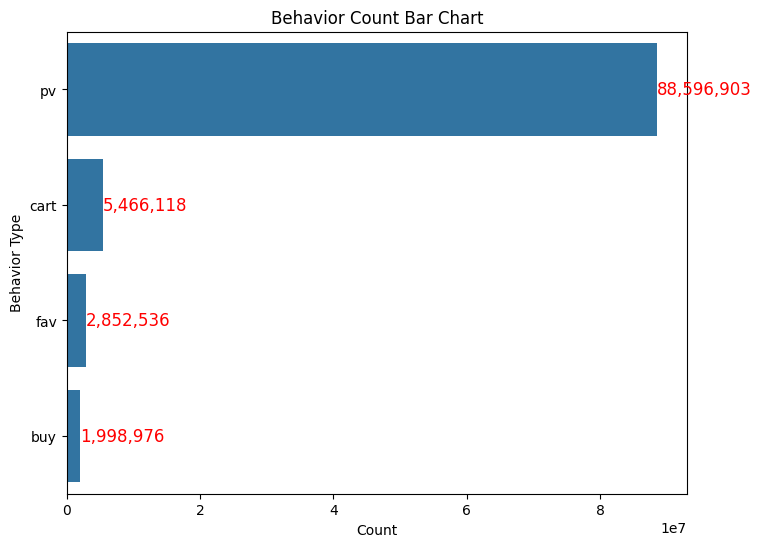

In [33]:
# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))

behavior_count_df = behavior_count_df.sort_values(by='Count', ascending=False)

ax = sns.barplot(x='Count', y='behavior_type', data=behavior_count_df, order=behavior_count_df['behavior_type'])

# Display data values on each bar
for i, count in enumerate(behavior_count_df['Count'].values):
    ax.text(count, i, '{:,}'.format(count), ha='left', va='center', color='red', fontsize=12)
        
# Customize the plot
plt.xlabel('Count')
plt.ylabel('Behavior Type')
plt.title('Behavior Count Bar Chart')

plt.show()

In [34]:
behavior_count_df

,behavior_type,Count
0,pv,88596903
1,cart,5466118
2,fav,2852536
3,buy,1998976


In [35]:
# 获取不同行为类型的数量
pv_count = behavior_count_df.loc[behavior_count_df['behavior_type'] == 'pv', 'Count'].values[0]
cart_count = behavior_count_df.loc[behavior_count_df['behavior_type'] == 'cart', 'Count'].values[0]
fav_count = behavior_count_df.loc[behavior_count_df['behavior_type'] == 'fav', 'Count'].values[0]
buy_count = behavior_count_df.loc[behavior_count_df['behavior_type'] == 'buy', 'Count'].values[0]

# 计算转化率
conversion_rate_pv_to_buy = (buy_count / pv_count) * 100
conversion_rate_pv_to_fav = (fav_count / pv_count) * 100
conversion_rate_fav_to_buy = (buy_count / fav_count) * 100
conversion_rate_pv_to_cart = (cart_count / pv_count) * 100
conversion_rate_cart_to_buy = (buy_count / cart_count) * 100
conversion_rate_fav_to_cart_to_buy = (buy_count / (fav_count + cart_count)) * 100

# 打印转化率结果
print(f"从浏览到购买的转化率为: {conversion_rate_pv_to_buy:.2f}%")
print(f"从浏览到收藏的转化率为: {conversion_rate_pv_to_fav:.2f}%")
print(f"从收藏到购买的转化率为: {conversion_rate_fav_to_buy:.2f}%")
print(f"从浏览到购物车的转化率为: {conversion_rate_pv_to_cart:.2f}%")
print(f"从购物车到购买的转化率为: {conversion_rate_cart_to_buy:.2f}%")
print(f"从收藏和购物车到购买的转化率为: {conversion_rate_fav_to_cart_to_buy:.2f}%")

从浏览到购买的转化率为: 2.26%
从浏览到收藏的转化率为: 3.22%
从收藏到购买的转化率为: 70.08%
从浏览到购物车的转化率为: 6.17%
从购物车到购买的转化率为: 36.57%
从收藏和购物车到购买的转化率为: 24.03%


1. 浏览到购买的转化率较低，仅为2.26%，可能需要进一步分析和优化购买环节，以提高转化率。
2. 浏览到收藏的转化率为3.22%，相对于浏览到购买的转化率更高，说明用户更倾向于先收藏商品再购买。
3. 从收藏到购买的转化率高达70.08%，显示了用户收藏行为对购买决策的重要性，可以考虑通过促销或提醒等方式引导用户完成购买。可能因为双12活动，为了凑金额，客户提前收藏，活动节点购买。
4. 浏览到购物车的转化率为6.17%，购物车是用户决策的重要阶段，可以关注购物车页面的优化以提升购买转化率。
5. 从购物车到购买的转化率为36.57%，这一阶段的转化率相对较高，但仍有改进空间，可以考虑简化购买流程或提供更多支付方式来提高转化率。
6. 从收藏和购物车到购买的综合转化率为24.03%，说明用户在进行多次行为后最终完成购买的意愿还是比较高的，可以通过个性化推荐等方式增加用户在这些阶段的互动。

### 用户活动频率

In [36]:

# Group data by 'User ID' and count interactions
user_activity_df = traffic_df.groupby('user_id').size().reset_index(name='Interactions')

# Calculate total number of days in the dataset
total_days = (end_date - start_date).days + 1

# Calculate activity frequency per day for each user
user_activity_df['ActivityFrequency'] = user_activity_df['Interactions'] / total_days

In [37]:
user_activity_df.describe()

,user_id,Interactions,ActivityFrequency
count,"987,984.0000","987,984.0000","987,984.0000"
mean,"509,386.4651",100.1175,11.1242
std,"293,866.2468",86.1080,9.5676
min,1.0000,1.0000,0.1111
25%,"254,967.7500",39.0000,4.3333
50%,"509,716.5000",74.0000,8.2222
75%,"763,970.2500",135.0000,15.0000
max,"1,018,011.0000",829.0000,92.1111


1. 用户活动频率的平均值为每天约10次，标准差为约8.61次。这表明用户在观察期间内平均每天与电商平台进行交互约10次，但存在一定的波动性。
2. 数据集中最少活跃的用户每天的活动频率为0.1次，而最活跃的用户每天的活动频率可达82.9次。这显示了用户之间在活动频率上存在很大的差异。
3. 数据集中大约25%的用户每天的活动频率低于3.9次，而大约25%的用户每天的活动频率高于13.5次。这表明有一部分用户非常活跃，而另一部分用户则相对较少参与交互。


## 物品纬度分析

In [38]:
# Calculate item purchase count
item_purchase_count = traffic_df[traffic_df['behavior_type'] == 'buy'][['item_id','category_id']].value_counts().reset_index(name='item_count')

# Calculate category popularity
category_purchase_count = traffic_df[traffic_df['behavior_type'] == 'buy']['category_id'].value_counts().reset_index(name='category_count')
print(item_purchase_count.describe())
print(category_purchase_count.describe())

             item_id    category_id   item_count
count   635,978.0000   635,978.0000 635,978.0000
mean  2,580,933.6591 2,582,620.7347       3.1432
std   1,489,944.1345 1,462,805.8509       9.0543
min           9.0000     2,171.0000       1.0000
25%   1,290,537.7500 1,299,190.0000       1.0000
50%   2,581,757.0000 2,590,256.0000       1.0000
75%   3,871,564.7500 3,860,845.0000       2.0000
max   5,163,068.0000 5,161,669.0000   1,408.0000
         category_id  category_count
count     7,093.0000      7,093.0000
mean  2,574,997.2061        281.8238
std   1,479,081.2564      1,373.1777
min       2,171.0000          1.0000
25%   1,308,215.0000          4.0000
50%   2,582,254.0000         23.0000
75%   3,837,094.0000        122.0000
max   5,161,669.0000     34,250.0000


**商品类别受欢迎程度分析**  
对于商品类别，尽管平均购买次数的数值也异常高，但中位数购买次数为23，这表明大部分商品类别的购买次数相对较低。  
这可能意味着顾客的购买行为更加集中在某些特定的商品类别上。

**营销策略建议**  
 重点推广热门商品：针对购买次数较高的商品，可以制定专门的营销活动，如限时折扣、捆绑销售或提供额外的忠诚度积分。  
优化产品组合：对于购买次数较低的商品，考虑是否需要调整产品特性、价格或促销策略，以提高其吸引力。  
季节性营销：分析购买数据的季节性变化，针对特定季节或节假日推出相关商品的促销活动。  
个性化推荐：利用顾客购买历史数据，提供个性化的商品推荐，增加顾客对商品的兴趣和购买概率。  
跨类别促销：结合热门商品和较少人关注的类别，设计跨类别的捆绑销售或组合优惠，以提高整体销售额。  

**库存管理措施**  
动态库存管理：对于热门商品，确保充足的库存以满足需求。对于购买次数较低的商品，适当减少库存，以减少积压和降低仓储成本。  
供应链协同：与供应商紧密合作，确保热门商品的及时补货，同时对于需求不稳定的商品，采取灵活的采购策略。  
需求预测：利用历史销售数据和市场趋势分析，进行准确的需求预测，以便更好地规划库存和采购计划。  
库存优化模型：采用先进的库存优化模型，如经济订货量（EOQ）模型，来平衡库存成本和顾客需求。  
退货管理：对于销售不佳的商品，制定有效的退货和换货政策，以减少库存积压和损失。  

In [39]:
item_top10 = item_purchase_count.head(10)

In [40]:
category_top10 = category_purchase_count.head(10)

In [41]:
item_top10

,item_id,category_id,item_count
0,3122135,1516409,1408
1,3031354,2735466,942
2,3964583,800581,671
3,2560262,2735466,658
4,2964774,1265358,614
5,740947,904454,553
6,1910706,1516409,546
7,1116492,2297500,512
8,705557,3158249,495
9,4443059,570735,490


In [42]:
category_top10

,category_id,category_count
0,1464116,34250
1,2735466,33426
2,2885642,31619
3,4145813,31418
4,4756105,28021
5,4801426,26258
6,982926,24572
7,2640118,18116
8,4159072,17917
9,1320293,16948


In [43]:
# 找出两个数据集中相同的 category_id
common_categories = pd.merge(item_top10, category_top10, on='category_id', how='inner')

print(common_categories)

   item_id  category_id  item_count  category_count
0  3031354      2735466         942           33426
1  2560262      2735466         658           33426


根据排名前10的品类中只有1个品类的商品销售量排名在前10这一情况，可以得出以下结论：

商品销售量与品类流量分布不均：这种情况表明，虽然某个品类的商品销售量在前10中排名较高，但其他品类的商品销售量并没有跟随排名在前10。这可能意味着不同品类的流量分布和购买转化率存在差异。

潜在优化机会：对于那些销售量排名未进入前10的品类，可能存在优化机会。通过分析这些品类的产品页面、营销策略、价格竞争力等方面，可以尝试改进并提升它们的销售表现。

需进一步调查原因：这种情况也可能暗示着潜在的市场趋势、消费者偏好变化或竞争环境变化。因此，值得进一步调查和分析，以了解为什么只有一个品类的商品销售量能够进入前10。

定制化营销策略：针对不同品类的表现差异，可以考虑实施更具针对性的定制化营销策略，以提高整体销售表现和市场份额。

# K-Means模型用户聚类分析
数据中没有金额数据，无法使用RFM模型进行用户类型分类，这里使用机器算法K-Means模型进行用户分类

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## 特征数据准备

In [45]:
# 筛选出有购买记录的user_id
buy_user_ids = traffic_df[traffic_df['behavior_type'] == 'buy']['user_id'].unique()

# 根据user_id筛选记录，包括pv, fav, cart, buy
filtered_df = traffic_df[traffic_df['user_id'].isin(buy_user_ids)]

# 如果数据完全相同（同一个用户，同一时间点，同一商品购买多件），对后期分析意义不大，这里进行去重处理
buyer_records_df = filtered_df.drop_duplicates()

In [46]:
purchase_records_df = buyer_records_df[buyer_records_df['behavior_type'] == 'buy']

### Recency

In [47]:
purchase_date_df = purchase_records_df.groupby('user_id')['timestamp'].max().reset_index()
recency_df = pd.DataFrame(columns=['user_id', 'Recency'])
recency_df['user_id'] = purchase_date_df['user_id']

In [48]:
# 实际业务中通常是根据当前日期计算
# today = pd.Timestamp(datetime.date.today())
# 因为本项目数据久远，数据日期是November 25 to December 03, 2017，以数据中最新日期的月底日期计算Recency
purchase_date = purchase_date_df['timestamp'].max()
latest_date = pd.Timestamp(year=purchase_date.year, month=purchase_date.month, day=pd.Period(purchase_date, freq='M').days_in_month)


In [49]:
# latest date - customer latest date = Recency in min
recency_df['Recency'] = ((latest_date - purchase_date_df['timestamp']).dt.total_seconds())/60

In [50]:
recency_df['Recency'].describe()

count   670,370.0000
mean     43,520.4337
std       3,477.0792
min      39,360.0167
25%      40,698.6625
50%      42,603.4833
75%      45,837.5417
max      51,840.0000
Name: Recency, dtype: float64

#### 查看Recency的分布

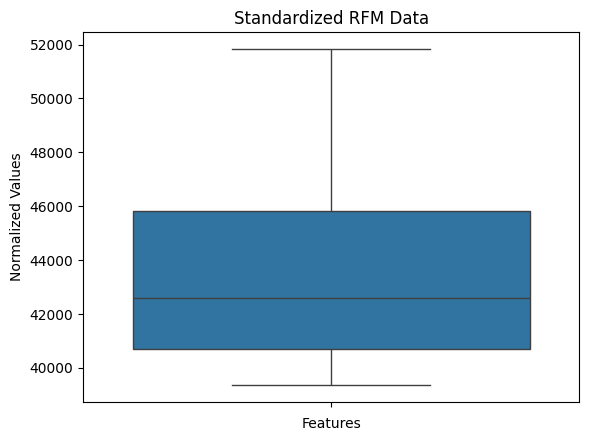

In [51]:
 # 创建箱线图
sns.boxplot(data=recency_df['Recency'])

# 添加标题和坐标轴标签
plt.title('Standardized RFM Data')
plt.xlabel('Features')
plt.ylabel('Normalized Values')

# 显示图像
plt.show()

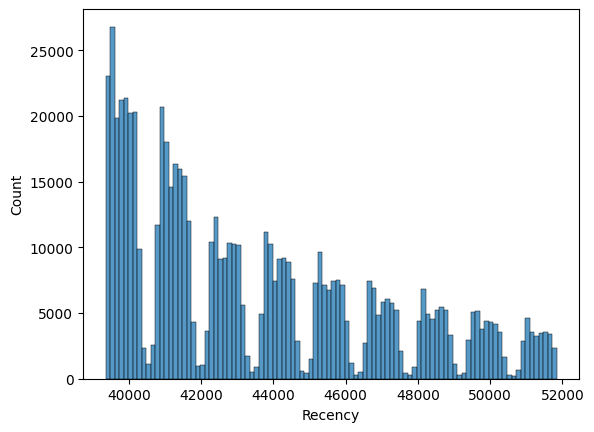

In [52]:
sns.histplot(data=recency_df, x='Recency', bins=100)
plt.show()

### Frequency

数据时间范围是2017/11/25-2017/12/03，一共9天。这里定义两天以上在taobao产生购买行为为复购，一天内有多次购买行为的不算做复购。

In [53]:
# 计算每个客户的频率
# 根据业务需求确认时间段（1month/3months/6months/1year），筛选客户的消费频率，
# 因数据久远，用数据全时段的总消费次数作为消费频率

# 统计每个用户ID出现的次数
frequency_df = purchase_records_df.groupby('user_id').size().reset_index(name='Frequency')

In [54]:
frequency_df['Frequency'].describe()

count   670,370.0000
mean          2.9819
std           2.8755
min           1.0000
25%           1.0000
50%           2.0000
75%           4.0000
max         262.0000
Name: Frequency, dtype: float64

#### 查看Recency的分布

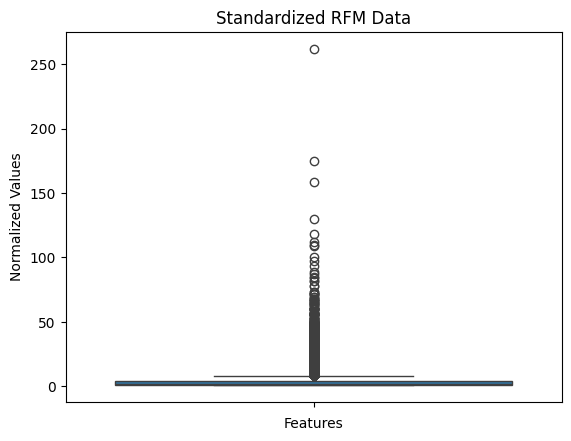

In [55]:
# 创建箱线图
sns.boxplot(data=frequency_df['Frequency'])

# 添加标题和坐标轴标签
plt.title('Standardized RFM Data')
plt.xlabel('Features')
plt.ylabel('Normalized Values')

# 显示图像
plt.show()

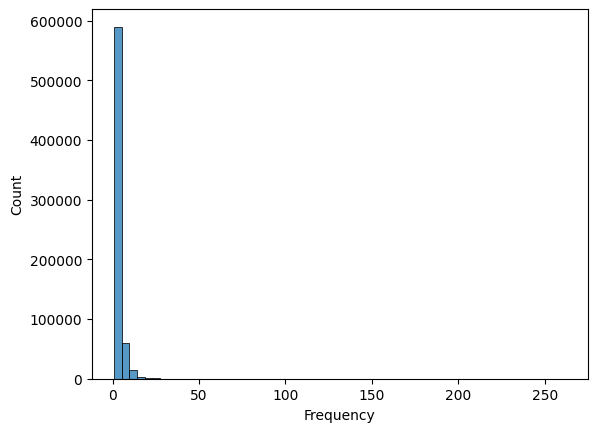

In [56]:
sns.histplot(data=frequency_df, x='Frequency', bins=60)
plt.show()

### 合并获取RF数据集

In [57]:
# 将 DataFrame 按照 user_id 列进行合并
rf_df = pd.merge(recency_df, frequency_df, on='user_id', how='inner')

### 用户行为

In [58]:
# 创建一个新的 DataFrame 来存储按 'behavior' 分组后的数据
behavior_count_df = buyer_records_df.groupby('user_id')['behavior_type'].value_counts().unstack().fillna(0).reset_index(drop=False)


In [59]:
# 重命名列
behavior_count_df.columns = ['user_id','buy', 'cart', 'fav', 'pv']

In [60]:
# 筛选有购买行为的用户
# behavior_count_df = behavior_count_df[behavior_count_df['buy']>0]
# 这一步不需要了，使用的数据集已经是购买用户的

In [61]:
# 将 DataFrame 按照 user_id 列进行合并
rfb_df = pd.merge(rf_df, behavior_count_df, on='user_id', how='inner')

In [62]:
del rfb_df['buy']

In [63]:
list(rfb_df)

['user_id', 'Recency', 'Frequency', 'cart', 'fav', 'pv']

## 归一化处理

In [64]:
rfb_normalized_df = rfb_df.drop('user_id',axis=1)

In [65]:
# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 选择需要归一化的列
# ['Recency', 'Frequency', 'cart', 'fav', 'pv'],定义selected_features，方便后续重复调用
selected_features = list(rfb_normalized_df)

# 对选定列进行最小-最大归一化处理
rfb_normalized_df[selected_features] = scaler.fit_transform(rfb_normalized_df[selected_features])

In [66]:
rfb_normalized_df

,Recency,Frequency,cart,fav,pv
0,0.1366,0.0230,0.0152,0.0192,0.0661
1,0.4116,0.0115,0.0660,0.0000,0.3280
2,0.9362,0.0000,0.0305,0.0055,0.1836
3,0.2311,0.0038,0.0051,0.0055,0.0869
4,0.2814,0.0000,0.0152,0.0000,0.1114
...,...,...,...,...,...
670365,0.1454,0.0268,0.0254,0.0000,0.0539
670366,0.0420,0.0038,0.0051,0.0356,0.1285
670367,0.2870,0.0038,0.1066,0.0055,0.3501
670368,0.1462,0.0192,0.0102,0.0000,0.0881


## Person系数

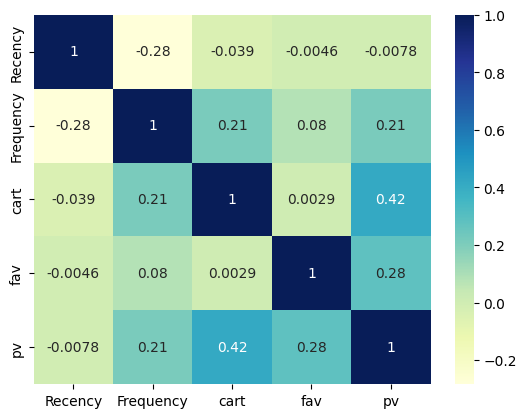

In [67]:
# selected_features = ['Recency', 'Frequency', 'cart', 'fav', 'pv']

# 计算相关系数
corr_matrix = rfb_normalized_df[selected_features].corr()

# 可视化分析
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# 显示图表
plt.show()

在一般情况下，相关性系数的大小可以按以下标准来衡量：  
0.8 - 1.0：非常强的正相关  
0.6 - 0.8：强的正相关  
0.4 - 0.6：中等程度的正相关  
0.2 - 0.4：弱的正相关  
0 - 0.2：几乎没有相关性  
对于负相关，同样的标准适用，只是方向相反。所以，如果相关性系数超过0.6或低于-0.6，通常会被认为是高度相关的。  
从途中可以看出绝大部分系数都在-0.3到0.3之间。这可能意味着数据集中的这些特征相互独立程度较高。

## Exploring Best K

通常可以通过以下方法来帮助确认最佳的簇数量：

**肘部法则（Elbow Method）**：通过绘制不同k值下的簇内平方和（WCSS）与k值的关系图，找到拐点（肘部），即随着k值增加，WCSS下降速度显著变缓的点。这个拐点通常对应着最佳的簇数量。

**轮廓系数（Silhouette Score）**：计算不同k值下数据点的轮廓系数，选择平均轮廓系数最大的k值作为最佳簇数量。较高的轮廓系数表示簇内相似度高，簇间差异大。
通常情况下，Silhouette Score 数字越接近1表示聚类效果越好。  
因此，数字大的 Silhouette Score 表示更好的聚类结果，因为它表明数据点更倾向于与其所在的簇内的点相似，同时与其他簇的点有较大差异。  
所以在选择最佳聚类数量时，通常会优先选择具有较高 Silhouette Score 的情况。

**Gap Statistic**：通过比较实际数据集与随机数据集的差异来确定最佳的簇数量。该方法考虑了数据集本身的特性，避免了仅依赖于内部指标的局限性。

**层次聚类（Hierarchical Clustering）**：使用层次聚类方法构建树状图（树状图中节点之间的距离），通过观察树状图找到合适的簇划分。

**业务理解**：结合业务理解，根据具体问题的需求和背景来确定最佳的簇数量。

### Elbow Curve

Elbow Curve，也被称为肘部法则（Elbow Method），是一种启发式的方法，通常用于确定K-means聚类算法中的最佳聚类数量K。
一般情况下，选择拐点作为最佳k值。这是因为在拐点之前，随着簇数增加，WCSS（Within-Cluster Sum of Squares）下降速度较快；  
而在拐点之后，下降速度变缓。  
观察曲线图，找到“肘部”的位置，即SSE下降速度骤减的点，这个点对应的K值就是最佳的聚类数量。  
根据Elbow Curve图，选取K=3。实际工作中，根据业务和解释性需求确认clusters数量。

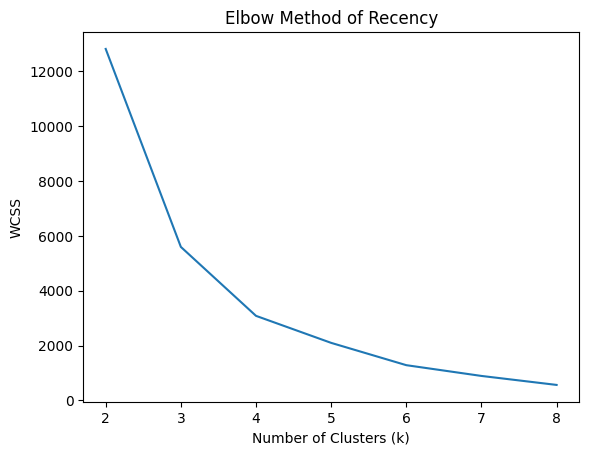

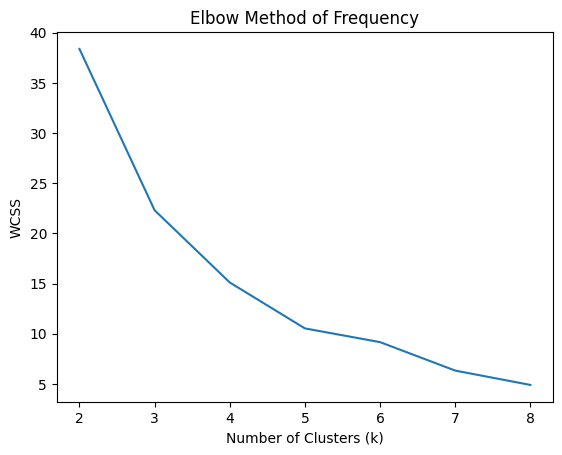

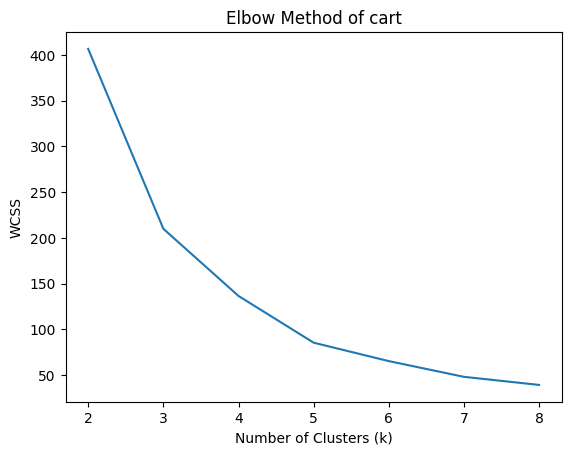

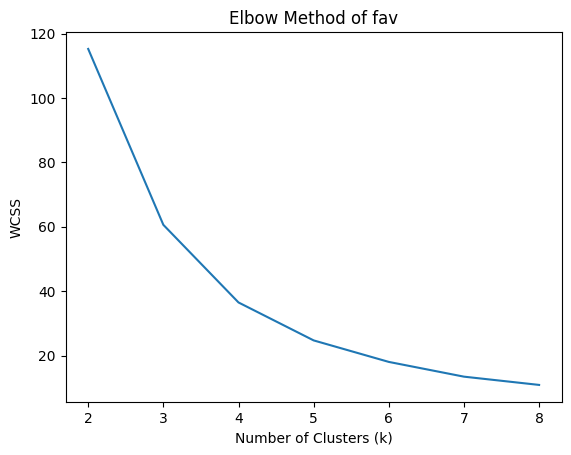

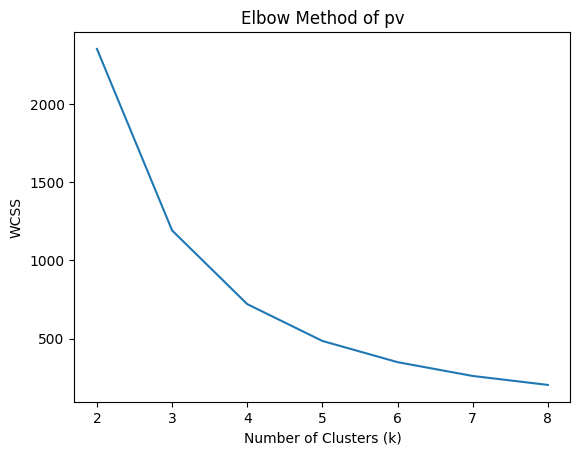

In [68]:
# Elbow Curve
# selected_features = ['Recency', 'Frequency', 'cart', 'fav', 'pv']

for feature in selected_features:
    wcss = []
    for i in range(2,9):
        kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0, max_iter=50)
        kmeans.fit(rfb_normalized_df[[feature]])
        wcss.append(kmeans.inertia_)

    sns.lineplot(x=range(2, 9), y=wcss)
    plt.title(f'Elbow Method of {feature}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

### Gap statistic

In [69]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans  
from sklearn.datasets import make_blobs  
from scipy.spatial.distance import cdist  
  
def optimal_k(data, max_k=10, n_ref=5, verbose=True):  
    """  
    Calculates Gap Statistic to estimate the optimal number of clusters.  
  
    Parameters:  
    data : ndarray  
        The input data to cluster.  
    max_k : int, optional  
        The maximum number of clusters to test. Default is 10.  
    n_ref : int, optional  
        Number of reference datasets to generate. Default is 5.  
    verbose : bool, optional  
        Print status messages. Default is True.  
  
    Returns:  
    optimal_k : int  
        The optimal number of clusters.  
    gap_values : ndarray  
        The computed gap values for each k.  
    """  
    gaps = np.zeros((max_k,))  
    log_wcss = np.zeros((max_k,))  
  
    ref_disp = np.zeros((n_ref, max_k))  
  
    for k in range(1, max_k + 1):  
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)  
        kmeans.fit(data)  
        log_wcss[k - 1] = kmeans.inertia_  
  
        # Reference dispersion  
        for i in range(n_ref):  
            X_b, _ = make_blobs(n_samples=data.shape[0], centers=k, cluster_std=0.60, random_state=i)  
            kmeans_ref = KMeans(n_clusters=k, init='k-means++', random_state=0)  
            kmeans_ref.fit(X_b)  
            ref_disp[i, k - 1] = kmeans_ref.inertia_  
  
    ref_disp_mean = np.mean(ref_disp, axis=0)  
    ref_disp_std = np.std(ref_disp, axis=0)  
  
    gaps = np.log(ref_disp_mean) - np.log(log_wcss)  
    gaps_std = np.std(np.log(ref_disp), axis=0)  
  
    if verbose:  
        print("Gap Statistic values:")  
        for k, gap, std in zip(range(1, max_k + 1), gaps, gaps_std):  
            print(f"k={k}, gap={gap:.3f}, std={std:.3f}")  
  
    optimal_k = gaps.argmax() + 1  
  
    if verbose:  
        print(f"\nOptimal number of clusters: {optimal_k}")  
  
    return optimal_k, gaps  


In [70]:
  
# 示例数据  
# selected_features = ['Recency', 'Frequency', 'cart', 'fav', 'pv']
data = rfb_normalized_df[selected_features].values  


Gap Statistic values:
k=1, gap=2.077, std=0.001
k=2, gap=3.123, std=0.001
k=3, gap=3.539, std=0.004
k=4, gap=3.747, std=0.003
k=5, gap=4.179, std=0.292
k=6, gap=4.091, std=0.035
k=7, gap=4.260, std=0.107
k=8, gap=4.309, std=0.025
k=9, gap=4.418, std=0.025
k=10, gap=4.557, std=0.074
k=11, gap=4.567, std=0.023

Optimal number of clusters: 11


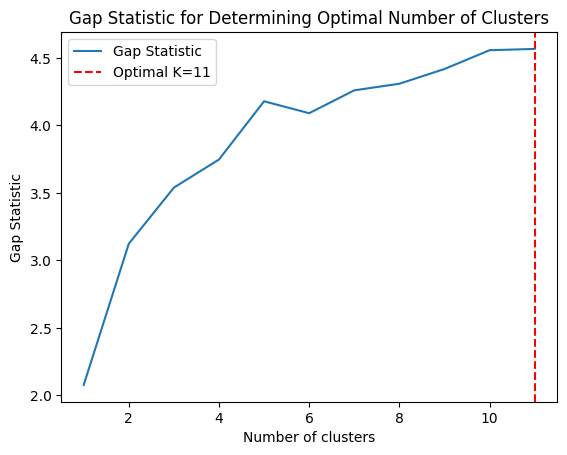

In [71]:
  
# 使用Gap Statistic确定最佳簇数  
optimal_k, gap_values = optimal_k(data, max_k=11)  
  
# 可视化Gap Statistic结果  
plt.plot(range(1, 12), gap_values, label='Gap Statistic')  
plt.axvline(x=optimal_k, linestyle='--', color='r', label=f'Optimal K={optimal_k}')  
plt.xlabel('Number of clusters')  
plt.ylabel('Gap Statistic')  
plt.title('Gap Statistic for Determining Optimal Number of Clusters')  
plt.legend()  
plt.show()

Gap Statistic结果中，可以看到对于不同的簇数（k值），计算得到的Gap值以及对应的标准差。  
通常，Gap值越大，表明该簇数可能是更好的选择。然而，为了确定最佳的簇数，我们还需要考虑Gap值的增长趋势和标准差。  
一种常见的方法是寻找Gap值增长开始趋于平稳的点，即“肘部”。在这个点上，增加簇数可能不会带来明显的改进，因此该点对应的簇数通常被视为最佳簇数。然而，由于存在标准差，也应该考虑Gap值的波动范围。  
图中Gap值从k=1到k=9一直呈现增长趋势，并且在k=9时达到最大值。然而不能仅仅基于最大值来确定最佳簇数，因为还需要考虑Gap值的增长是否开始趋于平稳。  
此外，k=10和k=11的Gap值虽然继续增长，但考虑到计算成本和数据集的复杂性，可能不需要进一步增加簇数。
另一个考虑因素是标准差。在某些k值处，Gap值的标准差可能较大，这表明该点处的Gap值可能不太稳定。

综合Elbow Curve和Gap statistic，选择best K = 5。

## K-means

**Method 1** :使用所有参数，直接kmeans，分组可能缺少可读性

In [72]:
# 使用kmeans_features的每个feature进行kmeans分类
# selected_features = ['Recency', 'Frequency', 'cart', 'fav', 'pv']
# kmeans_df = rfb_normalized_df.copy()
kmeans = KMeans(n_clusters=5,random_state=0)
rfb_normalized_df['all_cluster'] = kmeans.fit_predict(rfb_normalized_df[selected_features])


In [73]:
clusters_range_df = pd.DataFrame()
for feature in selected_features:
    cluster_ranges = rfb_normalized_df.groupby('all_cluster').agg({feature: ['max']}).reset_index()
    
    # 将两行列名变成一行
    cluster_ranges.columns = ['_'.join(col).strip() for col in cluster_ranges.columns.values]
    

    if clusters_range_df.empty:
        clusters_range_df = cluster_ranges
    else:
        clusters_range_df = pd.merge(clusters_range_df, cluster_ranges, on='all_cluster_')

# 重命名列名
clusters_range_df.rename(columns={'all_cluster_': 'cluster'}, inplace=True)


In [74]:
clusters_range_df

,cluster,Recency_max,Frequency_max,cart_max,fav_max,pv_max
0,0,0.6227,0.4176,1.0000,0.6329,1.0000
1,1,0.2116,1.0000,0.6142,0.6301,0.2313
2,2,0.7090,0.2146,0.7766,0.5890,0.9461
3,3,1.0000,0.1877,0.4721,0.5479,0.9914
4,4,0.4457,0.2261,0.4467,1.0000,0.3684


In [75]:
clusters_count_df = pd.DataFrame()
clusters_count_df[['cluster','count']] = rfb_normalized_df.groupby('all_cluster')['Recency'].count().reset_index()

In [76]:
clusters_count_df['percent'] = (clusters_count_df['count']/clusters_count_df['count'].sum())*100

In [77]:
clusters_count_df

,cluster,count,percent
0,0,65482,9.7680
1,1,248326,37.0431
2,2,110123,16.4272
3,3,104718,15.6209
4,4,141721,21.1407


In [78]:
clusters_df = pd.merge(clusters_count_df,clusters_range_df,on='cluster',how='inner')

In [79]:
clusters_df['Recency_max'] = abs(clusters_df['Recency_max']-1)

In [80]:
clusters_df

,cluster,count,percent,Recency_max,Frequency_max,cart_max,fav_max,pv_max
0,0,65482,9.7680,0.3773,0.4176,1.0000,0.6329,1.0000
1,1,248326,37.0431,0.7884,1.0000,0.6142,0.6301,0.2313
2,2,110123,16.4272,0.2910,0.2146,0.7766,0.5890,0.9461
3,3,104718,15.6209,0.0000,0.1877,0.4721,0.5479,0.9914
4,4,141721,21.1407,0.5543,0.2261,0.4467,1.0000,0.3684


| 类别 | 比列 | 用户特征 | 客户类型 | 运营策略 |
|---|---|---|---|---|
| 0 | 9.76% | 最近访问时间较短，购买频率和页面浏览量较高，购物篮和收藏最大值中等 | 活跃用户 | 个性化推荐、优质内容、专属活动、口碑传播 |
| 1 | 37.04% | 购买频率最高，访问时间和页面浏览量中等，购物篮和收藏最大值中等 | 高频购买用户 | 优惠活动、新品推荐、会员特权、快速便捷的购买体验 |
| 2 | 16.42% | 最近访问时间较长，购买频率和页面浏览量中等，购物篮和收藏最大值较高 | 潜在用户 | 个性化推荐、优惠活动、试用体验、产品介绍 |
| 3 | 15.62% | 最近访问时间为0，购买频率和页面浏览量较低，购物篮和收藏最大值中等 | 新用户 | 新手引导、新手礼包、用户关怀 |
| 4 | 21.14% | 购买频率和页面浏览量中等，购物篮和收藏最大值为1 | 忠诚用户 | 专属优惠、会员体系、产品共创 |


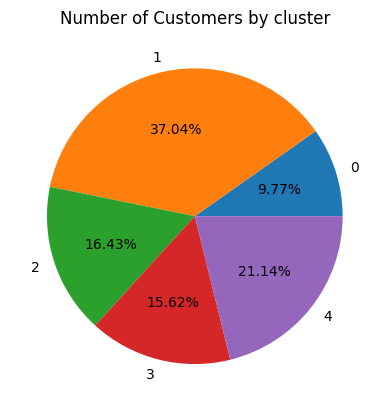

In [81]:
# 绘制cluster的饼图
plt.pie(clusters_df['count'], labels=clusters_df['cluster'], autopct='%1.2f%%')
plt.title('Number of Customers by cluster')

plt.show()

# 用户价值分析

## ARPU

(Average Revenue Per User)

ARPU是指每个用户平均产生的收入。它通常用于衡量公司的盈利能力和用户价值。
计算方法:

ARPU = 总收入 / 活跃用户数
例如，如果一个公司在一个月内总共获得了$10,000的收入，而活跃用户数为1,000人，则ARPU为$10。

## ARPPU

(Average Revenue Per Paying User):

ARPPU是指每个付费用户平均产生的收入。这个指标更专注于付费用户的价值。
计算方法:

ARPPU = 总收入 / 付费用户数
例如，如果一个公司在一个月内总共获得了$10,000的收入，而付费用户数为500人，则ARPPU为$20。

因为数据中没有提供销售额相关数据，无法分析，略过

## 复购率分析

复购，通常被理解为对某一产品的重复购买行为。然而，在商业实践中，这一定义显得过于笼统，不够精确。例如，一个用户在同一天内在淘宝进行多次购买，并不能简单地认为这位用户对淘宝产生了深度依赖，他可能只是首次尝试购物且需求较大。

在分析复购行为时，时间跨度是一个不可忽视的关键因素。我们通常会选取一个特定的时间段，如7天、30天、60天或90天等，来进行考察。这样的时间划分有助于我们区分用户的短期冲动购买与长期的品牌忠诚度。比如，一个用户在首次购买后的30天内再次下单，这可能意味着他对产品或服务持有较高的满意度和信任度。

除了时间跨度，购买频率也是复购分析中的重要考量。有些用户可能在短时间内频繁购买，但这并不必然代表他们对品牌有深厚的忠诚度，可能是受到促销活动或季节性需求的驱动。因此，在解读复购行为时，我们需要结合用户的购买模式和购买内容，来全面评估其品牌依赖度。

此外，用户购买的商品种类和类别也是分析复购行为时不可忽视的一环。如果用户多次购买的是同一类别或品牌的商品，这往往意味着他们对特定产品或品牌有着较高的忠诚度。相反，如果购买内容杂乱无章，可能只是用户在寻找优惠或满足临时需求。

在商业分析中，我们还需要对用户进行分层，以区分新用户和老用户的复购行为。新用户的复购可能更多地受到促销活动的影响，而老用户的复购则更能反映品牌的长期吸引力和用户的满意度。

最后，深入分析用户的购买行为模式也是至关重要的。例如，用户是否在特定的促销活动期间进行复购，或者是否在特定的场景下（如节假日、季节变换）进行购买，这些都能为我们提供更深入的洞察，帮助我们更准确地理解复购行为背后的动机和原因。

数据时间范围是2017/11/25-2017/12/03，一共9天。这里定义两天以上在taobao产生购买行为为复购，一天内有多次购买行为的不算做复购。

复购率的计算公式如下：

复购率 = （复购用户数 / 总用户数） * 100%

复购用户数：在至少隔一天，有至少两次购买行为的用户数量。  
总用户数：在同一时间范围内所有有购买行为的用户数量。

In [82]:
# 筛选出在2017/11/25-2017/12/03期间有购买行为的用户
purchase_records_df = traffic_df[traffic_df['behavior_type'] == 'buy']

In [83]:
len(purchase_records_df)

1998976

In [84]:
purchase_fre_df = purchase_records_df.copy()

In [85]:
purchase_fre_df['time_diff'] = purchase_fre_df.groupby('user_id')['date'].diff()

In [86]:
# 筛选出时间间隔大于等于1天的用户，即符合新定义的复购用户
repeat_purchase_records = purchase_fre_df[purchase_fre_df['time_diff'] >= pd.Timedelta(days=1)]['user_id'].unique()
num_repeat_purchase_records = len(repeat_purchase_records)

print(f"在2017/11/25-2017/12/03期间，有{num_repeat_purchase_records}位用户符合新定义的复购（隔一天以上有购买行为）。")

在2017/11/25-2017/12/03期间，有367561位用户符合新定义的复购（隔一天以上有购买行为）。


In [87]:
# 计算复购率
repurchase_rate = (num_repeat_purchase_records / purchase_fre_df['user_id'].nunique()) * 100
print(f"在2017/11/25-2017/12/03期间，复购率为: {repurchase_rate:.2f}%")

在2017/11/25-2017/12/03期间，复购率为: 54.83%
